### Example: Accurate data representation

- Image data is often represented as a 3d array of floating point or integer values
    - Two dimensions for pixel coordiantes, one for color properties
- Using floating point or integer data types can make things awkward:
    - If color dimension is floating point full saturation is the number 1.0. If integer, full saturation is 255
    - Need metadata attached to image to know which dimension is color dimension
    - Programmer needs to think about how to interpret the range of possible values for individual pixel coordinates
- These subtleties make it hard to write general algorithms (representation dependent)

### Julia's response

- Instead of looking at an image as `Array{Float64, 3}` or `Array{Int,3}` and worrying about these scales/transformations, look at it as `Array{RGB{UfixedBase{Uint8,8}},2}`
- This type is a two dimensional array (for `x` and `y` coordinates) filled with `RGB{UfixedBase{Uint8,8}}`
- `RGB{T}` is a parametric type for representing the RGB color space using data of type `T`
- Here `T = UfixedBase{Uint8,8}` which represents fractional numbers on the unit interval in just one byte (8 bits).

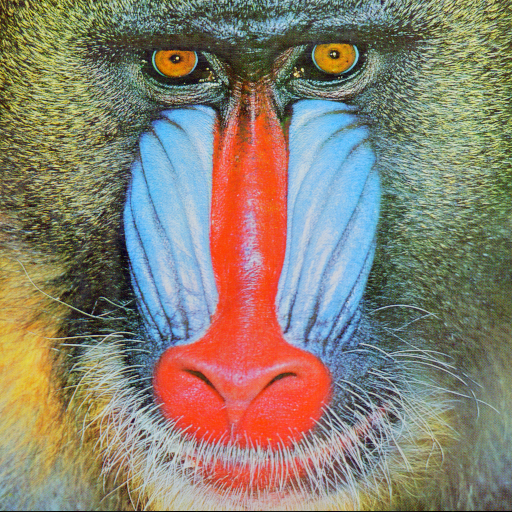

In [3]:
# load packages we will use
using Images, Color, FixedPointNumbers, ImageView, TestImages

# load test image
img = testimage("mandrill")

In [4]:
# see internal representation
show(img)

RGB Images.Image with:
  data: 512x512 Array{Color.RGB{FixedPointNumbers.UfixedBase{UInt8,8}},2}
  properties:
    imagedescription: <suppressed>
    spatialorder:  x y
    pixelspacing:  1 1

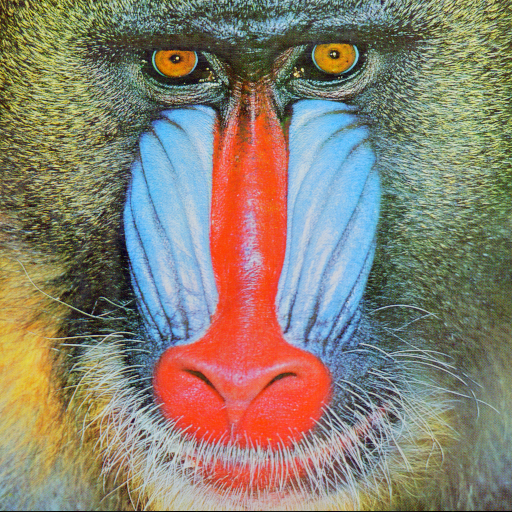

In [5]:
# convert to different color space
img_hsv = convert(Image{HSV}, float32(img))

In [6]:
show(img_hsv)

HSV Images.Image with:
  data: 512x512 Array{Color.HSV{Float32},2}
  properties:
    imagedescription: <suppressed>
    spatialorder:  x y
    pixelspacing:  1 1

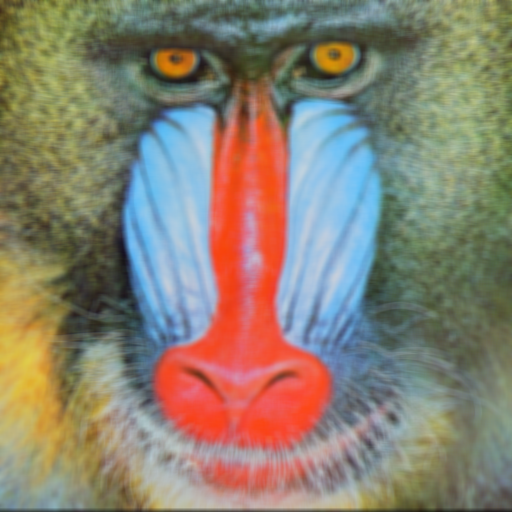

In [7]:
# blurring
kern = ones(Float32,7,7)/49
imgf = imfilter(img, kern)

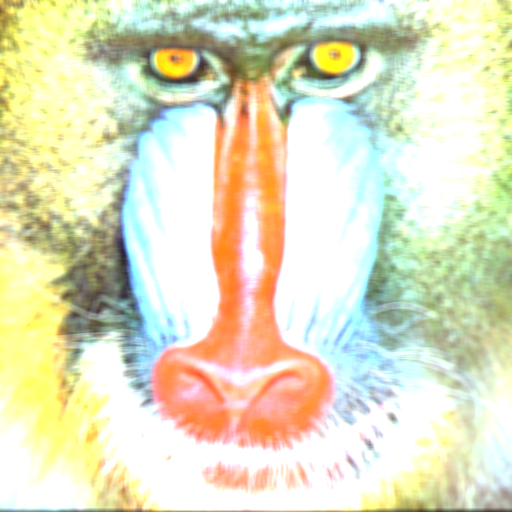

In [8]:
# over saturated
imgs = 2imgf
imgs

In [17]:
methodswith(typeof(img.data))

0-element Array{Method,1}